<a href="https://colab.research.google.com/github/mbl-cin/Sistemas_inteligentes/blob/main/Fuzzy_C_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo
!pip install -U scikit-fuzzy
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from sklearn import metrics
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler

In [ ]:
# Obtendo os dados
estimation_of_obesity_levels = fetch_ucirepo(id=544)
X = estimation_of_obesity_levels.data.features[['Height', 'Weight']]
X_train = StandardScaler().fit_transform(X)
alldata = X_train.T

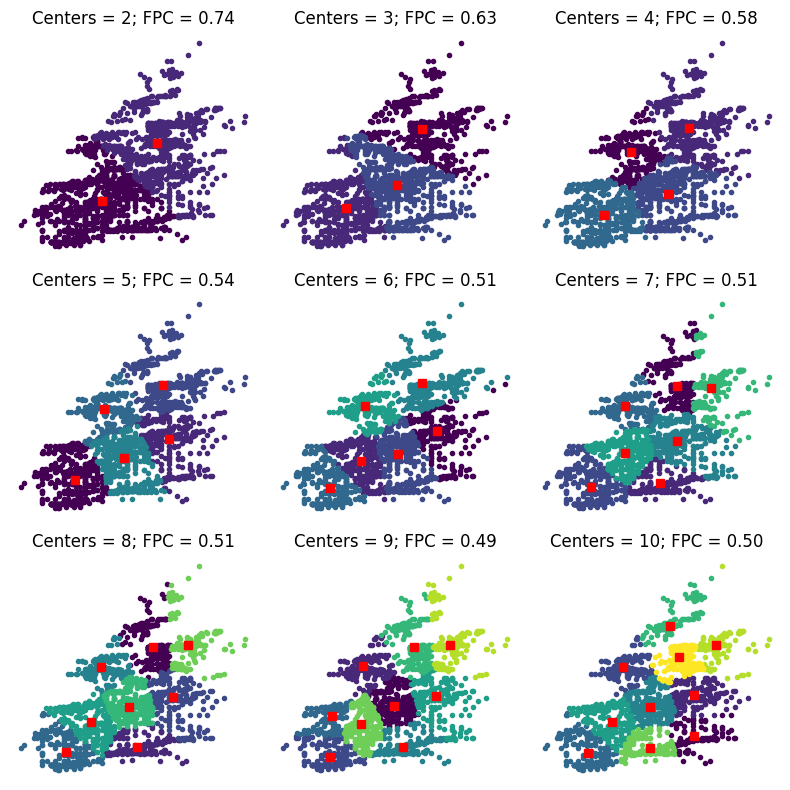

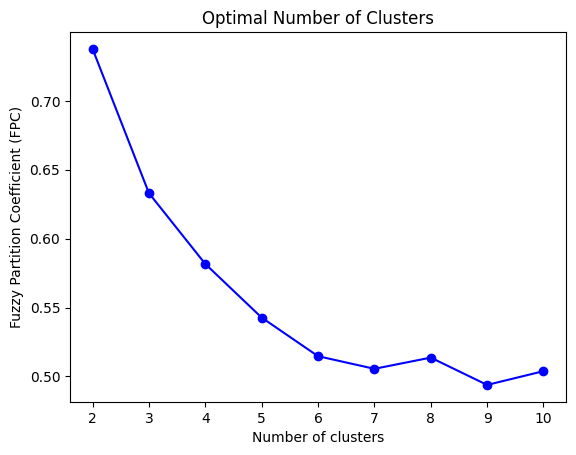

In [ ]:
# Configuração para o plot
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
colors = plt.cm.viridis(np.linspace(0, 1, 10))

fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Armazenar valores de FPC
    fpcs.append(fpc)

    # Atribuição de clusters
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(alldata[0, cluster_membership == j],
                alldata[1, cluster_membership == j], '.', color=colors[j])

    # Marcar o centro de cada cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()
plt.show()

# Plotando os valores de FPC para visualizar o número ótimo de clusters
plt.figure()
plt.plot(range(2, 11), fpcs, '-o', color='blue')
plt.xlabel("Number of clusters")
plt.ylabel("Fuzzy Partition Coefficient (FPC)")
plt.title("Optimal Number of Clusters")
plt.show()

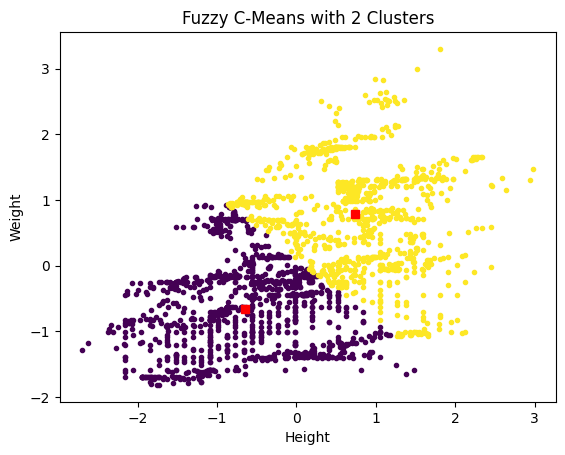

In [ ]:
# Aplicando Fuzzy C-Means com 2 clusters
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    alldata, 2, 2, error=0.005, maxiter=1000, init=None)

# Plotando os clusters
fig2, ax2 = plt.subplots()
colors = plt.cm.viridis(np.linspace(0, 1, 2))  # Duas cores para dois clusters

# Atribuição de clusters
cluster_membership = np.argmax(u, axis=0)

for j in range(2):
    ax2.plot(alldata[0, cluster_membership == j],
             alldata[1, cluster_membership == j], '.', color=colors[j])

# Marcar o centro de cada cluster
for pt in cntr:
    ax2.plot(pt[0], pt[1], 'rs')

ax2.set_title('Fuzzy C-Means with 2 Clusters')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [ ]:
# Calculando o coeficiente de silhueta para a clusterização com 2 clusters
# Precisamos dos labels de cluster em formato apropriado para a função silhouette_score
silhouette_avg = metrics.silhouette_score(alldata.T, cluster_membership)
print('Silhouette Coefficient for 2 clusters:', silhouette_avg)

Silhouette Coefficient for 2 clusters: 0.4040366864867593
